### **FEATURE ENGINEERING AND PREPROCESSING**

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, classification_report, roc_auc_score, r2_score, roc_curve, ConfusionMatrixDisplay, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline as ImbPipeline 

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [69]:
# load clean and compiled dataset
df = pd.read_csv('Kenya Nairobi Securities Exchange (NSE) All Stocks Prices 2023-2024/NSE_2021_2024_Final', index_col=0)
df.head()

,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Volume,Sector,Change,Change%
0,2021-01-04,EGAD,Eaagads Ltd,8.2,14.0,12.5,12.5,12.5,12.5,3200.0,Agricultural,0.0,0.0
1,2021-01-04,KUKZ,Kakuzi Plc,300.0,397.0,365.0,365.0,365.0,365.0,0.0,Agricultural,0.0,0.0
2,2021-01-04,KAPC,Kapchorua Tea Kenya Plc,59.0,90.0,78.0,78.0,78.0,78.0,0.0,Agricultural,0.0,0.0
3,2021-01-04,LIMT,Limuru Tea Plc,360.0,475.0,360.0,360.0,360.0,360.0,100.0,Agricultural,0.0,0.0
4,2021-01-04,SASN,Sasini Plc,14.8,20.0,19.5,19.5,19.5,19.5,0.0,Agricultural,0.0,0.0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60268 entries, 0 to 60267
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       60268 non-null  object 
 1   Code       60268 non-null  object 
 2   Name       60268 non-null  object 
 3   12m Low    60268 non-null  float64
 4   12m High   60268 non-null  float64
 5   Day Low    60268 non-null  float64
 6   Day High   60268 non-null  float64
 7   Day Price  60268 non-null  float64
 8   Previous   60268 non-null  float64
 9   Volume     60268 non-null  float64
 10  Sector     60268 non-null  object 
 11  Change     60268 non-null  float64
 12  Change%    60268 non-null  float64
dtypes: float64(9), object(4)
memory usage: 6.4+ MB


In [71]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60268 entries, 0 to 60267
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       60268 non-null  datetime64[ns]
 1   Code       60268 non-null  object        
 2   Name       60268 non-null  object        
 3   12m Low    60268 non-null  float64       
 4   12m High   60268 non-null  float64       
 5   Day Low    60268 non-null  float64       
 6   Day High   60268 non-null  float64       
 7   Day Price  60268 non-null  float64       
 8   Previous   60268 non-null  float64       
 9   Volume     60268 non-null  float64       
 10  Sector     60268 non-null  object        
 11  Change     60268 non-null  float64       
 12  Change%    60268 non-null  float64       
dtypes: datetime64[ns](1), float64(9), object(3)
memory usage: 6.4+ MB


In [72]:
# sort df by code then date
df = df.sort_values(by=['Code', 'Date']).reset_index(drop=True)
df.head()

,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Volume,Sector,Change,Change%
0,2021-01-04,ABSA,ABSA Bank Kenya Plc,8.5,14.2,9.42,9.80,9.52,9.66,18500.0,Banking,-0.14,-1.449275
1,2021-01-05,ABSA,ABSA Bank Kenya Plc,8.5,14.2,9.44,9.70,9.44,9.52,1923300.0,Banking,-0.08,-0.840336
2,2021-01-06,ABSA,ABSA Bank Kenya Plc,8.5,14.2,9.40,9.68,9.44,9.44,233400.0,Banking,0.00,0.000000
3,2021-01-07,ABSA,ABSA Bank Kenya Plc,8.5,14.2,9.36,9.46,9.40,9.44,194700.0,Banking,-0.04,-0.423729
4,2021-01-11,ABSA,ABSA Bank Kenya Plc,8.5,14.2,9.44,9.70,9.46,9.48,77900.0,Banking,-0.02,-0.210970


In [73]:
# y_price - next day price
df['Next Day Price'] = df.groupby('Code')['Day Price'].shift(-1)

df.head()

,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Volume,Sector,Change,Change%,Next Day Price
0,2021-01-04,ABSA,ABSA Bank Kenya Plc,8.5,14.2,9.42,9.80,9.52,9.66,18500.0,Banking,-0.14,-1.449275,9.44
1,2021-01-05,ABSA,ABSA Bank Kenya Plc,8.5,14.2,9.44,9.70,9.44,9.52,1923300.0,Banking,-0.08,-0.840336,9.44
2,2021-01-06,ABSA,ABSA Bank Kenya Plc,8.5,14.2,9.40,9.68,9.44,9.44,233400.0,Banking,0.00,0.000000,9.40
3,2021-01-07,ABSA,ABSA Bank Kenya Plc,8.5,14.2,9.36,9.46,9.40,9.44,194700.0,Banking,-0.04,-0.423729,9.46
4,2021-01-11,ABSA,ABSA Bank Kenya Plc,8.5,14.2,9.44,9.70,9.46,9.48,77900.0,Banking,-0.02,-0.210970,9.50


In [74]:
# creating target
percentage_threshold = 0.01

df['Price Change %'] = ((df['Next Day Price'] - df['Day Price']) / df['Day Price']) * 100


df.head()

,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Volume,Sector,Change,Change%,Next Day Price,Price Change %
0,2021-01-04,ABSA,ABSA Bank Kenya Plc,8.5,14.2,9.42,9.80,9.52,9.66,18500.0,Banking,-0.14,-1.449275,9.44,-0.840336
1,2021-01-05,ABSA,ABSA Bank Kenya Plc,8.5,14.2,9.44,9.70,9.44,9.52,1923300.0,Banking,-0.08,-0.840336,9.44,0.000000
2,2021-01-06,ABSA,ABSA Bank Kenya Plc,8.5,14.2,9.40,9.68,9.44,9.44,233400.0,Banking,0.00,0.000000,9.40,-0.423729
3,2021-01-07,ABSA,ABSA Bank Kenya Plc,8.5,14.2,9.36,9.46,9.40,9.44,194700.0,Banking,-0.04,-0.423729,9.46,0.638298
4,2021-01-11,ABSA,ABSA Bank Kenya Plc,8.5,14.2,9.44,9.70,9.46,9.48,77900.0,Banking,-0.02,-0.210970,9.50,0.422833


In [75]:
df['Buy Signal'] = np.nan

df.loc[df['Price Change %'].notna(), 'Buy Signal'] = (df.loc[df['Price Change %'].notna(), 'Price Change %'] > percentage_threshold).astype(int)

# Drop the 'Next Day Price' and 'Price Change %' 
df = df.drop(columns=['Next Day Price', 'Price Change %'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60268 entries, 0 to 60267
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        60268 non-null  datetime64[ns]
 1   Code        60268 non-null  object        
 2   Name        60268 non-null  object        
 3   12m Low     60268 non-null  float64       
 4   12m High    60268 non-null  float64       
 5   Day Low     60268 non-null  float64       
 6   Day High    60268 non-null  float64       
 7   Day Price   60268 non-null  float64       
 8   Previous    60268 non-null  float64       
 9   Volume      60268 non-null  float64       
 10  Sector      60268 non-null  object        
 11  Change      60268 non-null  float64       
 12  Change%     60268 non-null  float64       
 13  Buy Signal  60207 non-null  float64       
dtypes: datetime64[ns](1), float64(10), object(3)
memory usage: 6.4+ MB


In [76]:
# drop rows with missing values
df.dropna(subset=['Buy Signal'], inplace=True)
df['Buy Signal'].value_counts()

Buy Signal
0.0    43361
1.0    16846
Name: count, dtype: int64

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60207 entries, 0 to 60266
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        60207 non-null  datetime64[ns]
 1   Code        60207 non-null  object        
 2   Name        60207 non-null  object        
 3   12m Low     60207 non-null  float64       
 4   12m High    60207 non-null  float64       
 5   Day Low     60207 non-null  float64       
 6   Day High    60207 non-null  float64       
 7   Day Price   60207 non-null  float64       
 8   Previous    60207 non-null  float64       
 9   Volume      60207 non-null  float64       
 10  Sector      60207 non-null  object        
 11  Change      60207 non-null  float64       
 12  Change%     60207 non-null  float64       
 13  Buy Signal  60207 non-null  float64       
dtypes: datetime64[ns](1), float64(10), object(3)
memory usage: 6.9+ MB


In [78]:
df['Volume'].value_counts()

Volume
0.0          17266
100.0         2525
200.0         1510
300.0         1016
400.0          793
             ...  
882400.0         1
288700.0         1
2328200.0        1
670200.0         1
256200.0         1
Name: count, Length: 7114, dtype: int64

In [79]:
#  define the 0 as non trading days
df['Is_Trading_Day'] = (df['Volume'] > 0).astype(int)

In [80]:
# log transformation 
df['Volume_log'] = np.log1p(df['Volume'])
df.head()

,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Volume,Sector,Change,Change%,Buy Signal,Is_Trading_Day,Volume_log
0,2021-01-04,ABSA,ABSA Bank Kenya Plc,8.5,14.2,9.42,9.80,9.52,9.66,18500.0,Banking,-0.14,-1.449275,0.0,1,9.825580
1,2021-01-05,ABSA,ABSA Bank Kenya Plc,8.5,14.2,9.44,9.70,9.44,9.52,1923300.0,Banking,-0.08,-0.840336,0.0,1,14.469554
2,2021-01-06,ABSA,ABSA Bank Kenya Plc,8.5,14.2,9.40,9.68,9.44,9.44,233400.0,Banking,0.00,0.000000,0.0,1,12.360513
3,2021-01-07,ABSA,ABSA Bank Kenya Plc,8.5,14.2,9.36,9.46,9.40,9.44,194700.0,Banking,-0.04,-0.423729,1.0,1,12.179220
4,2021-01-11,ABSA,ABSA Bank Kenya Plc,8.5,14.2,9.44,9.70,9.46,9.48,77900.0,Banking,-0.02,-0.210970,1.0,1,11.263194


In [81]:
df['Volume_log'].value_counts()

Volume_log
0.000000     17266
4.615121      2525
5.303305      1510
5.707110      1016
5.993961       793
             ...  
13.690402        1
12.573147        1
14.660606        1
13.415333        1
12.453718        1
Name: count, Length: 7114, dtype: int64

In [82]:
df['Change%'].value_counts()

Change%
 0.000000    25515
 5.555556       65
 5.263158       54
-5.263158       50
-5.000000       48
             ...  
-6.299213        1
 4.109589        1
 1.344086        1
-2.393617        1
 4.347826        1
Name: count, Length: 17236, dtype: int64

In [83]:
df['Is_Price_Changed'] = (df['Change%'] != 0).astype(int)
df.head()

,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Volume,Sector,Change,Change%,Buy Signal,Is_Trading_Day,Volume_log,Is_Price_Changed
0,2021-01-04,ABSA,ABSA Bank Kenya Plc,8.5,14.2,9.42,9.80,9.52,9.66,18500.0,Banking,-0.14,-1.449275,0.0,1,9.825580,1
1,2021-01-05,ABSA,ABSA Bank Kenya Plc,8.5,14.2,9.44,9.70,9.44,9.52,1923300.0,Banking,-0.08,-0.840336,0.0,1,14.469554,1
2,2021-01-06,ABSA,ABSA Bank Kenya Plc,8.5,14.2,9.40,9.68,9.44,9.44,233400.0,Banking,0.00,0.000000,0.0,1,12.360513,0
3,2021-01-07,ABSA,ABSA Bank Kenya Plc,8.5,14.2,9.36,9.46,9.40,9.44,194700.0,Banking,-0.04,-0.423729,1.0,1,12.179220,1
4,2021-01-11,ABSA,ABSA Bank Kenya Plc,8.5,14.2,9.44,9.70,9.46,9.48,77900.0,Banking,-0.02,-0.210970,1.0,1,11.263194,1


In [84]:
# feature engineer 
features_to_lag = ['Day Price', 'Volume_log', 'Change%', 'Day High', 'Day Low', 'Is_Price_Changed']
lags = [1, 2, 3, 5] 
moving_average_windows = [5, 10, 20]

processed_dfs = []

for code in df['Code'].unique():
    stock_df = df[df['Code'] == code].copy()

    # Create lagged features
    for feature in features_to_lag:
        for lag in lags:
            stock_df[f'{feature}_lag_{lag}'] = stock_df[feature].shift(lag)

    # Create moving averages
    for feature in features_to_lag:
        for window in moving_average_windows:
            stock_df[f'{feature}_MA_{window}'] = stock_df[feature].rolling(window=window).mean()

    processed_dfs.append(stock_df)

df = pd.concat(processed_dfs).reset_index(drop=True)
df.head()



,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Volume,...,Change%_MA_20,Day High_MA_5,Day High_MA_10,Day High_MA_20,Day Low_MA_5,Day Low_MA_10,Day Low_MA_20,Is_Price_Changed_MA_5,Is_Price_Changed_MA_10,Is_Price_Changed_MA_20
0,2021-01-04,ABSA,ABSA Bank Kenya Plc,8.5,14.2,9.42,9.80,9.52,9.66,18500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-05,ABSA,ABSA Bank Kenya Plc,8.5,14.2,9.44,9.70,9.44,9.52,1923300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-06,ABSA,ABSA Bank Kenya Plc,8.5,14.2,9.40,9.68,9.44,9.44,233400.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-07,ABSA,ABSA Bank Kenya Plc,8.5,14.2,9.36,9.46,9.40,9.44,194700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-11,ABSA,ABSA Bank Kenya Plc,8.5,14.2,9.44,9.70,9.46,9.48,77900.0,...,NaN,9.668,NaN,NaN,9.412,NaN,NaN,0.8,NaN,NaN


In [85]:
# drop volume column
df = df.drop(columns=['Volume'])

In [86]:
# drop rows with missing values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59048 entries, 19 to 60206
Data columns (total 58 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    59048 non-null  datetime64[ns]
 1   Code                    59048 non-null  object        
 2   Name                    59048 non-null  object        
 3   12m Low                 59048 non-null  float64       
 4   12m High                59048 non-null  float64       
 5   Day Low                 59048 non-null  float64       
 6   Day High                59048 non-null  float64       
 7   Day Price               59048 non-null  float64       
 8   Previous                59048 non-null  float64       
 9   Sector                  59048 non-null  object        
 10  Change                  59048 non-null  float64       
 11  Change%                 59048 non-null  float64       
 12  Buy Signal              59048 non-null  float64   

In [87]:
# preprocessing function
def label_encode(df):

    # Label encode 'Code'
    le_code = LabelEncoder()
    df['Code_encoded'] = le_code.fit_transform(df['Code'])

    df = df.drop(columns=['Code', 'Name'])
    return df

df = label_encode(df)
df.head()

,Date,12m Low,12m High,Day Low,Day High,Day Price,Previous,Sector,Change,Change%,...,Day High_MA_5,Day High_MA_10,Day High_MA_20,Day Low_MA_5,Day Low_MA_10,Day Low_MA_20,Is_Price_Changed_MA_5,Is_Price_Changed_MA_10,Is_Price_Changed_MA_20,Code_encoded
19,2021-02-01,8.5,11.9,8.9,9.36,9.04,9.32,Banking,-0.28,-3.004292,...,9.384,9.486,9.586,9.056,9.216,9.316,1.0,0.8,0.80,0
20,2021-02-02,8.5,11.9,8.9,9.38,8.90,9.04,Banking,-0.14,-1.548673,...,9.384,9.446,9.565,8.992,9.158,9.290,1.0,0.9,0.80,0
21,2021-02-03,8.5,11.9,9.0,9.34,9.18,8.90,Banking,0.28,3.146067,...,9.372,9.410,9.547,8.988,9.114,9.268,1.0,1.0,0.80,0
22,2021-02-04,8.5,11.9,9.1,9.30,9.10,9.18,Banking,-0.08,-0.871460,...,9.352,9.390,9.528,9.008,9.080,9.253,1.0,1.0,0.85,0
23,2021-02-05,8.5,11.9,9.1,9.30,9.26,9.10,Banking,0.16,1.758242,...,9.336,9.370,9.520,9.000,9.050,9.240,1.0,1.0,0.85,0


In [88]:
df['Code_encoded'].value_counts()

Code_encoded
0     968
31    968
33    968
34    968
35    968
     ... 
25    968
26    968
27    968
28    968
60    968
Name: count, Length: 61, dtype: int64

In [89]:
# splitting data
split_point = int(len(df) * 0.75)

train_df = df.iloc[:split_point]
test_df = df.iloc[split_point:]

test_df.head()

,Date,12m Low,12m High,Day Low,Day High,Day Price,Previous,Sector,Change,Change%,...,Day High_MA_5,Day High_MA_10,Day High_MA_20,Day Low_MA_5,Day Low_MA_10,Day Low_MA_20,Is_Price_Changed_MA_5,Is_Price_Changed_MA_10,Is_Price_Changed_MA_20,Code_encoded
45160,2024-01-10,4.38,55.75,8.0,8.0,8.0,8.0,Construction and Allied,0.0,0.0,...,8.0,8.0,8.288,8.0,8.0,8.288,0.0,0.0,0.05,45
45161,2024-01-11,4.38,55.75,8.0,8.0,8.0,8.0,Construction and Allied,0.0,0.0,...,8.0,8.0,8.252,8.0,8.0,8.252,0.0,0.0,0.05,45
45162,2024-01-12,4.38,55.75,8.0,8.0,8.0,8.0,Construction and Allied,0.0,0.0,...,8.0,8.0,8.216,8.0,8.0,8.216,0.0,0.0,0.05,45
45163,2024-01-15,4.38,55.75,8.0,8.0,8.0,8.0,Construction and Allied,0.0,0.0,...,8.0,8.0,8.180,8.0,8.0,8.180,0.0,0.0,0.05,45
45164,2024-01-16,4.38,55.75,8.0,8.0,8.0,8.0,Construction and Allied,0.0,0.0,...,8.0,8.0,8.144,8.0,8.0,8.144,0.0,0.0,0.05,45


In [91]:
# drop date and 12 month low and high column
df = df.drop(columns=['Date', '12m Low', '12m High'])


In [93]:
# define X and y
features = [col for col in df.columns if col not in ['Day Price', 'Buy Signal']]

X_train = train_df[features]
y_train_price = train_df['Day Price']
y_train_buy = train_df['Buy Signal']

X_test = test_df[features]
y_test_price = test_df['Day Price']
y_test_buy = test_df['Buy Signal']

print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")
print(f"Training target price shape: {y_train_price.shape}, Training target buy shape: {y_train_buy.shape}")


Training data shape: (44286, 52), Test data shape: (14762, 52)
Training target price shape: (44286,), Training target buy shape: (44286,)


In [96]:
numerical_features = [col for col in X_train.columns if X_train[col].dtype in ['float64', 'int64']]
categorical_feature = ['Sector']

### **RANDOM FOREST**

* This is the baseline model

In [ ]:
# modeling pipline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_features), 
        ('cat_ohe', OneHotEncoder(handle_unknown='ignore'), categorical_feature)
    ])


# Create the Regression Pipeline (for Day Price)
price_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))
])

# Create the Classification Pipeline (for Buy Signal)
buy_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, class_weight='balanced'))
])

In [103]:
# train pipelines
price_pipeline.fit(X_train, y_train_price)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['Day Low', 'Day High',
                                                   'Previous', 'Change',
                                                   'Change%', 'Volume_log',
                                                   'Day Price_lag_1',
                                                   'Day Price_lag_2',
                                                   'Day Price_lag_3',
                                                   'Day Price_lag_5',
                                                   'Volume_log_lag_1',
                                                   'Volume_log_lag_2',
                                                   'Volume_log_lag_3',
                                                   'Volume_log_lag_5',
                                                   'Change%_lag_1',
                                                   'Change%_lag_2',
                                                   'Change%_lag_3',
                                                   'Change%...
                                                   'Day High_lag_1',
                                                   'Day High_lag_2',
                                                   'Day High_lag_3',
                                                   'Day High_lag_5',
                                                   'Day Low_lag_1',
                                                   'Day Low_lag_2',
                                                   'Day Low_lag_3',
                                                   'Day Low_lag_5',
                                                   'Is_Price_Changed_lag_1',
                                                   'Is_Price_Changed_lag_2',
                                                   'Is_Price_Changed_lag_3',
                                                   'Is_Price_Changed_lag_5', ...]),
                                                 ('cat_ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sector'])])),
                ('regressor',
                 RandomForestRegressor(n_jobs=-1, random_state=42))])

In [104]:
buy_pipeline.fit(X_train, y_train_buy)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['Day Low', 'Day High',
                                                   'Previous', 'Change',
                                                   'Change%', 'Volume_log',
                                                   'Day Price_lag_1',
                                                   'Day Price_lag_2',
                                                   'Day Price_lag_3',
                                                   'Day Price_lag_5',
                                                   'Volume_log_lag_1',
                                                   'Volume_log_lag_2',
                                                   'Volume_log_lag_3',
                                                   'Volume_log_lag_5',
                                                   'Change%_lag_1',
                                                   'Change%_lag_2',
                                                   'Change%_lag_3',
                                                   'Change%...
                                                   'Day High_lag_3',
                                                   'Day High_lag_5',
                                                   'Day Low_lag_1',
                                                   'Day Low_lag_2',
                                                   'Day Low_lag_3',
                                                   'Day Low_lag_5',
                                                   'Is_Price_Changed_lag_1',
                                                   'Is_Price_Changed_lag_2',
                                                   'Is_Price_Changed_lag_3',
                                                   'Is_Price_Changed_lag_5', ...]),
                                                 ('cat_ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sector'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', n_jobs=-1,
                                        random_state=42))])

In [106]:
# evaluate price model
y_pred_price = price_pipeline.predict(X_test)
rmse_price = np.sqrt(mean_squared_error(y_test_price, y_pred_price))
r2_price = r2_score(y_test_price, y_pred_price)

print(f'RMSE: {rmse_price}')
print(f'R2: {r2_price}')


RMSE: 1.0350012772268764
R2: 0.9996835628650718


* The models prediction is off by 1.04 which is very low
* 

In [109]:
# buy/not buy evaluation
y_pred_buy = buy_pipeline.predict(X_test)
accuracy_buy = accuracy_score(y_test_buy, y_pred_buy)

print(classification_report(y_test_buy, y_pred_buy, target_names=['Not Buy', 'Buy']))

              precision    recall  f1-score   support

     Not Buy       0.70      0.96      0.81     10171
         Buy       0.47      0.08      0.14      4591

    accuracy                           0.69     14762
   macro avg       0.58      0.52      0.47     14762
weighted avg       0.63      0.69      0.60     14762



* When the model predicts buy it is only correct 47% of the time and only identifies 8% of actual buy

### **XGBOOST**

In [113]:
neg_count = y_train_buy.value_counts()[0]
pos_count = y_train_buy.value_counts()[1]
scale_pos_weight_value = neg_count / pos_count
scale_pos_weight_value

2.708424049572936

In [120]:
# xgboost pipeline
price_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42, n_jobs=-1))
    ])

    # NEW: Use XGBClassifier for buy/not buy prediction with scale_pos_weight
buy_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, random_state=42, n_jobs=-1,
                                         scale_pos_weight=scale_pos_weight_value, eval_metric='logloss')) 
    ])


In [123]:
# train price pipeline
price_pipeline.fit(X_train, y_train_price)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['Day Low', 'Day High',
                                                   'Previous', 'Change',
                                                   'Change%', 'Volume_log',
                                                   'Day Price_lag_1',
                                                   'Day Price_lag_2',
                                                   'Day Price_lag_3',
                                                   'Day Price_lag_5',
                                                   'Volume_log_lag_1',
                                                   'Volume_log_lag_2',
                                                   'Volume_log_lag_3',
                                                   'Volume_log_lag_5',
                                                   'Change%_lag_1',
                                                   'Change%_lag_2',
                                                   'Change%_lag_3',
                                                   'Change%...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=-1,
                              num_parallel_tree=None, ...))])

In [121]:
# train buy pipeline
buy_pipeline.fit(X_train, y_train_buy)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['Day Low', 'Day High',
                                                   'Previous', 'Change',
                                                   'Change%', 'Volume_log',
                                                   'Day Price_lag_1',
                                                   'Day Price_lag_2',
                                                   'Day Price_lag_3',
                                                   'Day Price_lag_5',
                                                   'Volume_log_lag_1',
                                                   'Volume_log_lag_2',
                                                   'Volume_log_lag_3',
                                                   'Volume_log_lag_5',
                                                   'Change%_lag_1',
                                                   'Change%_lag_2',
                                                   'Change%_lag_3',
                                                   'Change%...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=-1,
                               num_parallel_tree=None, ...))])

In [127]:
y_pred_price = price_pipeline.predict(X_test)
y_pred_buy = buy_pipeline.predict(X_test)
y_pred_proba_buy = buy_pipeline.predict_proba(X_test)

print(f'Price RMSE: {np.sqrt(mean_squared_error(y_test_price, y_pred_price)):.2f}')
print(f'Price R2: {r2_score(y_test_price, y_pred_price):.2f}')
print('Buy Signal Classification Report:\n', classification_report(y_test_buy, y_pred_buy, target_names=['Not Buy', 'Buy']))

Price RMSE: 1.75
Price R2: 1.00
Buy Signal Classification Report:
               precision    recall  f1-score   support

     Not Buy       0.76      0.59      0.67     10171
         Buy       0.40      0.60      0.48      4591

    accuracy                           0.59     14762
   macro avg       0.58      0.59      0.57     14762
weighted avg       0.65      0.59      0.61     14762



In [ ]:
# visualize metrics function
def plot_metrics_combined(clf, X_test, y_true, class_names, fig_size=(14, 6), cmap_cm='BrBG_r'):
    n_class = len(class_names)

    fig, ax = plt.subplots(1, 2, figsize=fig_size)

    y_pred = clf.predict(X_test)

    ConfusionMatrixDisplay.from_predictions(
        y_true=y_true,
        y_pred=y_pred,
        cmap=cmap_cm,
        normalize='true',
        ax=ax[0],
        display_labels=class_names,
        values_format=".2f"
    )
    ax[0].set_title('Normalized Confusion Matrix')
    ax[0].tick_params(axis='x', rotation=45)
    ax[0].tick_params(axis='y', rotation=0)

    # Plot ROC Curve
    pred_prob = clf.predict_proba(X_test)
    colors = plt.colormaps['tab10'](np.linspace(0, 1, n_class))
    
    if pred_prob.ndim > 1 and pred_prob.shape[1] > 1:
        y_score = pred_prob[:, 1]
    else:
        y_score = pred_prob 

    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc_val = auc(fpr, tpr)
    ax[1].plot(fpr, tpr, color=colors[1], label=f'{class_names[1]} (AUC = {roc_auc_val:.2f})') 

    
    ax[1].plot([0, 1], [0, 1], 'k--', lw=2)
        
    ax[1].set_title('ROC Curve for Buy Signal')
    ax[1].set_xlabel('False Positive Rate (FPR)')
    ax[1].set_ylabel('True Positive Rate (TPR) / Recall')
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_ylim([0.0, 1.05])
    ax[1].legend(loc="lower right")
    ax[1].grid(True)

    plt.tight_layout()
    plt.show()

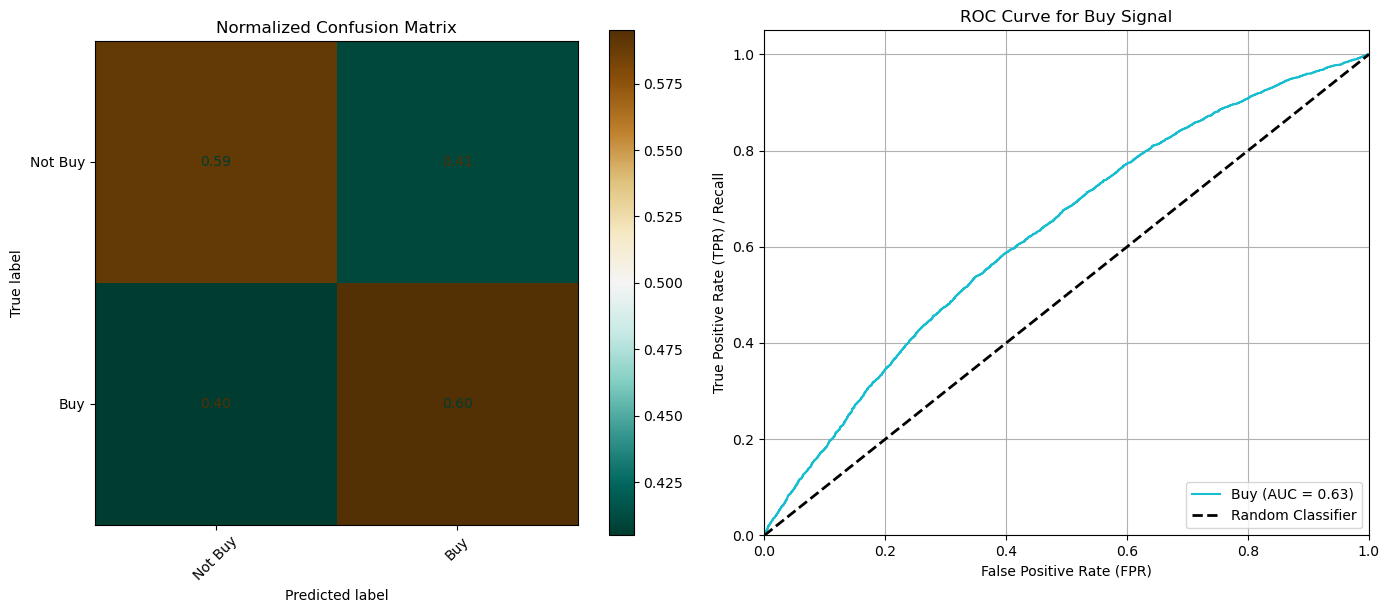

In [141]:
plot_metrics_combined(buy_pipeline, X_test, y_test_buy, class_names=['Not Buy', 'Buy'])

* Significant improvement in identifying actual buying opportunities from 8% to 60% even though the precision and overall accuracy have decreased

In [144]:
# hyperparameter tuning
param_grid = {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__learning_rate': [0.05, 0.1, 0.2],
        'classifier__max_depth': [3, 5, 7]
    }

    
grid_search = GridSearchCV(
        estimator=buy_pipeline,
        param_grid=param_grid,
        scoring='roc_auc', 
        cv=3, 
        n_jobs=-1, 
        verbose=2
    )

grid_search.fit(X_train, y_train_buy)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         SimpleImputer(),
                                                                         ['Day '
                                                                          'Low',
                                                                          'Day '
                                                                          'High',
                                                                          'Previous',
                                                                          'Change',
                                                                          'Change%',
                                                                          'Volume_log',
                                                                          'Day '
                                                                          'Price_lag_1',
                                                                          'Day '
                                                                          'Price_lag_2',
                                                                          'Day '
                                                                          'Price_lag_3',
                                                                          'Day '
                                                                          'Price_lag_5',
                                                                          'Volume_log_lag_1',
                                                                          'Volume_log_lag_2',
                                                                          'Volume_log_lag_3',
                                                                          'Volume_log_lag_5',
                                                                          'Change%_lag_1',...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=100,
                                                      n_jobs=-1,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.05, 0.1, 0.2],
                         'classifier__max_depth': [3, 5, 7],
                         'classifier__n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=2)

In [145]:
buy_pipeline = grid_search.best_estimator_

In [146]:
price_pipeline.fit(X_train, y_train_price)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['Day Low', 'Day High',
                                                   'Previous', 'Change',
                                                   'Change%', 'Volume_log',
                                                   'Day Price_lag_1',
                                                   'Day Price_lag_2',
                                                   'Day Price_lag_3',
                                                   'Day Price_lag_5',
                                                   'Volume_log_lag_1',
                                                   'Volume_log_lag_2',
                                                   'Volume_log_lag_3',
                                                   'Volume_log_lag_5',
                                                   'Change%_lag_1',
                                                   'Change%_lag_2',
                                                   'Change%_lag_3',
                                                   'Change%...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=-1,
                              num_parallel_tree=None, ...))])

In [147]:
y_pred_price = price_pipeline.predict(X_test)
    
print(f'Price RMSE: {np.sqrt(mean_squared_error(y_test_price, y_pred_price)):.2f}')
print(f'Price R2: {r2_score(y_test_price, y_pred_price):.2f}')

Price RMSE: 1.75
Price R2: 1.00


In [148]:
y_pred_buy = buy_pipeline.predict(X_test)
y_pred_proba_buy = buy_pipeline.predict_proba(X_test)

print('Buy Signal Classification Report:\n', classification_report(y_test_buy, y_pred_buy, target_names=['Not Buy', 'Buy']))

Buy Signal Classification Report:
               precision    recall  f1-score   support

     Not Buy       0.81      0.42      0.55     10171
         Buy       0.38      0.78      0.51      4591

    accuracy                           0.53     14762
   macro avg       0.60      0.60      0.53     14762
weighted avg       0.68      0.53      0.54     14762



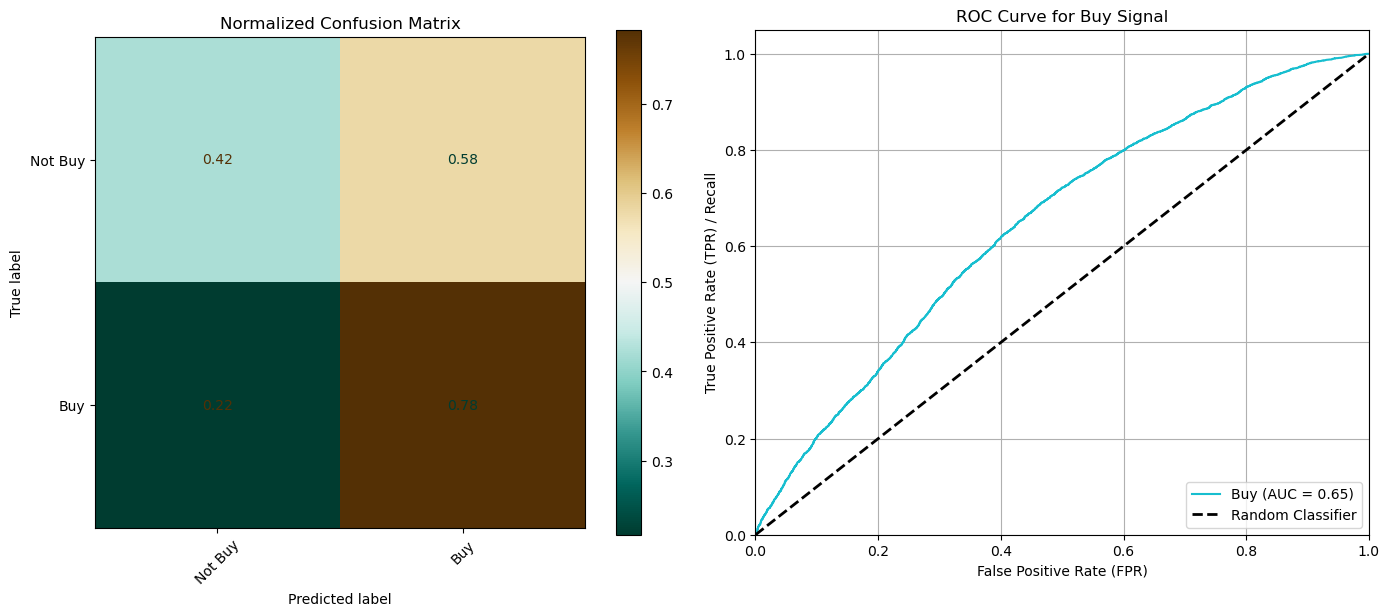

In [149]:
plot_metrics_combined(buy_pipeline, X_test, y_test_buy, class_names=['Not Buy', 'Buy'])

In [176]:
# combine oversampling and undersampling
buy_pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smoteenn', SMOTEENN(random_state=42, sampling_strategy=0.65)), 
        ('classifier', xgb.XGBClassifier(objective='binary:logistic', random_state=42, n_jobs=-1,
                                         eval_metric='logloss'))
    ])

In [177]:
buy_pipeline.fit(X_train, y_train_buy) 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['Day Low', 'Day High',
                                                   'Previous', 'Change',
                                                   'Change%', 'Volume_log',
                                                   'Day Price_lag_1',
                                                   'Day Price_lag_2',
                                                   'Day Price_lag_3',
                                                   'Day Price_lag_5',
                                                   'Volume_log_lag_1',
                                                   'Volume_log_lag_2',
                                                   'Volume_log_lag_3',
                                                   'Volume_log_lag_5',
                                                   'Change%_lag_1',
                                                   'Change%_lag_2',
                                                   'Change%_lag_3',
                                                   'Change%...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=-1,
                               num_parallel_tree=None, ...))])

In [178]:
y_pred_buy = buy_pipeline.predict(X_test)
y_pred_proba_buy = buy_pipeline.predict_proba(X_test)

print('Buy Signal Classification Report:\n', classification_report(y_test_buy, y_pred_buy, target_names=['Not Buy', 'Buy']))

Buy Signal Classification Report:
               precision    recall  f1-score   support

     Not Buy       0.74      0.71      0.72     10171
         Buy       0.42      0.46      0.44      4591

    accuracy                           0.63     14762
   macro avg       0.58      0.58      0.58     14762
weighted avg       0.64      0.63      0.64     14762



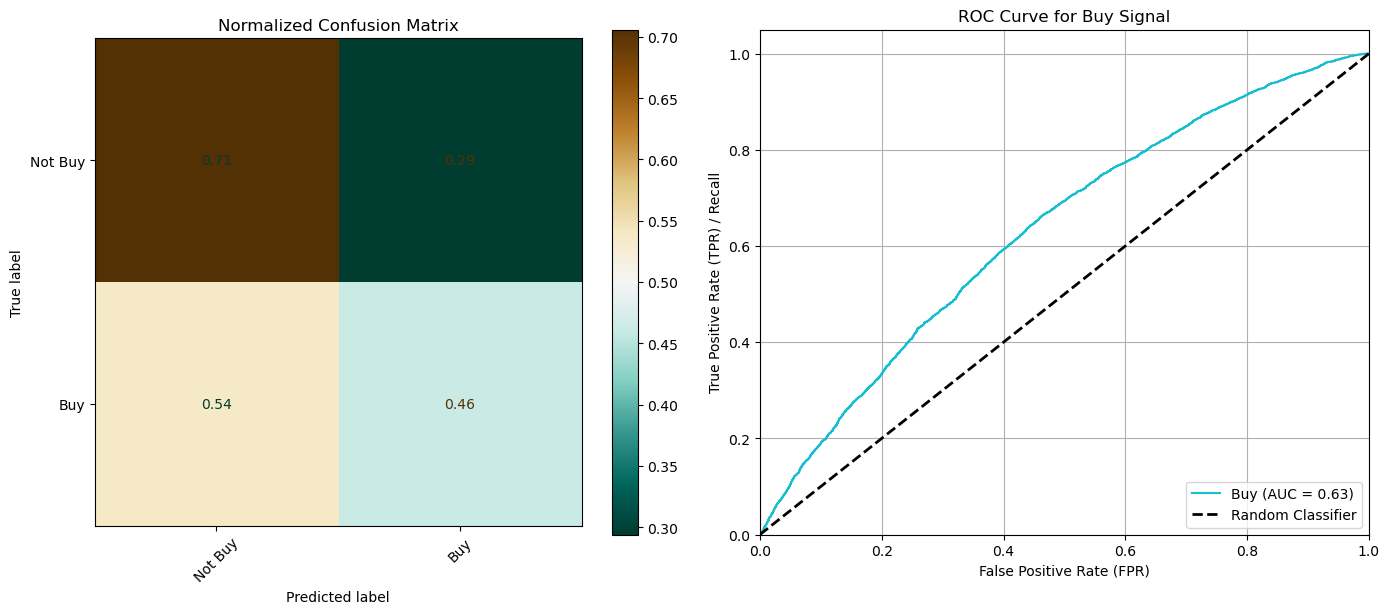

In [179]:
plot_metrics_combined(buy_pipeline, X_test, y_test_buy, class_names=['Not Buy', 'Buy'])

## ** LSTM**